In [124]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
%run implementations.ipynb
%reload_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [83]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# 1. First model: Raw Data

In [91]:

# first to split the data into training and testing

ratio = 0.8
seed = 3

x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed)


### 1.1 Training using Least Squares

In [93]:
# First Model using least squares

weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print("Training MSE: ", MSE_tr, "\nTesting MSE:", MSE_te)
#0.3394801404386906  0.34056956713540926

Training MSE:  0.3394801404386906 
Testing MSE: 0.34056956713540926


### 1.2 Prediction using Least squares

In [69]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
print("Prediction Accuracy: ", np.mean(y_te==y_pred)) # 0.34396

Prediction Accuracy:  0.74242


# 2. Second Model: Pre-processing

In [70]:
# removing all nan but there actually are none
tX_2 = tX[~np.isnan(tX).any(axis=1)]

# removing all rows with -999, there are 181886
y = y[np.all(tX_2 != -999, axis=1)]
tX_2 = tX_2[np.all(tX_2 != -999, axis=1)]

x_tr, x_te, y_tr, y_te = split_data(tX_2, y, ratio, seed)

# then to standardize x_tr and x_te
x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

# next to add a column of ones
y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 2.1.1 Training using Least Squares with pre-processing

In [71]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print("Training MSE: ", MSE_tr, "\nTesting MSE:", MSE_te) 
#0.36864162046559024 0.5411866496785176

Training MSE:  0.36864162046559024 
Testing MSE: 0.5411866496785176


### 2.1.2 Prediction using Least Squares with pre-processing

In [73]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
print("Prediction Accuracy: ", np.mean(y_te==y_pred)) # 0.6121265506863393

Prediction Accuracy:  0.6121265506863393


# 3. Third Model: Better Pre-processing

In [74]:
# replace nans with mean

tX_3 = replace_nan_with_mean(tX, -999)
x_tr, x_te, y_tr, y_te = split_data(tX_3, y, ratio, seed)

# then to standardize x_tr and x_te
x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

# next to add a column of ones
y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 3.1.1 Training using Least Squares with better pre-processing

In [75]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print("Training MSE: ", MSE_tr, "\nTesting MSE:", MSE_te) 
#0.4978447945914067  0.6275084689089252

Training MSE:  0.4978447945914067 
Testing MSE: 0.6275084689089252


### 3.1.2 Prediction using Least Squares with better pre-processing

In [76]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
print("Prediction Accuracy: ", np.mean(y_te==y_pred)) # 0.6121265506863393

Prediction Accuracy:  0.5331424796300375


# 4. Model 1 with Ridge Regression

In [89]:
## we noticed that the first model had the best accuracy, without any pre-processing.
## we then applied ridge regression to the first model.

x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed)


### 4.1 Ridge Regressiong

In [107]:
lambdas = [0, 1e-15, 1e-10, 1e-5, 1, 1e1, 1000]

for lambda_ in lambdas:
    
    w, loss = ridge_regression(y_tr, x_tr, lambda_)
    y_pred = predict_labels(w, x_te)
    print("Lambda=" + str(lambda_)+"; Loss="+str(loss))

    # predict on the test data slice
    y_pred = predict_labels(w, x_te)
    # Check accuracy
    print("Prediction Accuracy: ", str(np.mean(y_te == y_pred)) + "\n")
    # Best for lambda = 0, Accuracy = 0.742

Lambda=0; Loss=0.3394801404386932
Prediction Accuracy:  0.74242

Lambda=1e-15; Loss=0.33948014043869323
Prediction Accuracy:  0.74242

Lambda=1e-10; Loss=0.33948014044178076
Prediction Accuracy:  0.74242

Lambda=1e-05; Loss=0.33948053067594797
Prediction Accuracy:  0.74238

Lambda=1; Loss=0.3533787279917536
Prediction Accuracy:  0.73164

Lambda=10.0; Loss=0.3565863372538669
Prediction Accuracy:  0.72986

Lambda=1000; Loss=0.3823587921558087
Prediction Accuracy:  0.69884



### 4.2 Regularized Ridge Regression

In [ ]:
lambdas = [0, 1e-15, 1e-10, 1e-5, 1, 1e1, 1000]

max_iter = 10
gamma = 0.01
lambda_ = 0.3
threshold = 1e-8
losses = []

x_tr = x_tr.T
y_tr = y_tr.T
w = np.zeros((x_tr.shape[1], 1))

# start the logistic regression
for iter in range(max_iter):
    # get loss and update w.
    loss, w = learning_by_penalized_gradient(y_tr, x_tr, w, gamma, lambda_)
    # log info
    if iter % 100 == 0:
        print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
    # converge criterion
    losses.append(loss)
    if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
        break
# visualization
visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
print("loss={l}".format(l=calculate_loss(y, tx, w)))


### 2.2.1  GD for Second Model : train

In [42]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.08

# Initialization
w_initial = np.ones(x_tr.shape[1])

gradient_w, gradient_loss = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma) 

print("Gradient final loss for w* = " + str(gradient_loss)) # 0.4131388507357264

Step 1/150 loss = 16.742723002367942
Step 2/150 loss = 13.640113171583614
Step 3/150 loss = 11.197208614873603
Step 4/150 loss = 9.241386941981181
Step 5/150 loss = 7.6637217309515515
Step 6/150 loss = 6.386469086966029
Step 7/150 loss = 5.350289705071333
Step 8/150 loss = 4.5084324324530805
Step 9/150 loss = 3.8235432932229134
Step 10/150 loss = 3.2655939588419374
Step 11/150 loss = 2.8103795766576725
Step 12/150 loss = 2.4383641700028043
Step 13/150 loss = 2.133768862969578
Step 14/150 loss = 1.883843255860377
Step 15/150 loss = 1.6782801536029566
Step 16/150 loss = 1.5087443685174633
Step 17/150 loss = 1.3684929531113643
Step 18/150 loss = 1.2520689442005608
Step 19/150 loss = 1.1550542964765451
Step 20/150 loss = 1.0738705085735656
Step 21/150 loss = 1.005617694447243
Step 22/150 loss = 0.9479446554141303
Step 23/150 loss = 0.8989439562644814
Step 24/150 loss = 0.8570671735948378
Step 25/150 loss = 0.8210564219510524
Step 26/150 loss = 0.7898890181788069
Step 27/150 loss = 0.762732

### 2.2.2  GD for Second Model : predict

In [43]:
# predict on the train data slice using the gradient_w
y_pred = predict_labels(gradient_w, x_tr)
# Check accuracy
print(np.mean(y_tr == y_pred)) # 0.6810115431906186

# predict on the test data slice
y_pred = predict_labels(gradient_w, x_te)
# Check accuracy
print(np.mean(y_te == y_pred)) # 0.687954195111209

0.6810115431906186
0.687954195111209


### 2.3  Ridge regression for Second Model : train

## 3. Third Model: replace all the nanValues with the column mean

In [47]:
tX_3 = replace_nan_with_mean(tX, -999)
x_tr, x_te, y_tr, y_te = split_data(tX_3, y, ratio, seed)

x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 3.1.1 Third Model: Use least_squares : train

In [25]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

### 3.1.2 Third Model: Use least_squares: prediction

In [24]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.5331424796300375

0.5331424796300375

### 3.2.1 Third Model: Use GD : Train

In [27]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.08

# Initialization
w_initial = np.ones(x_tr.shape[1])

gradient_w, gradient_loss = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma) 

print("Gradient final loss for w* = " + str(gradient_loss)) # 0.5114768097194176


Step 1/150 loss = 17.3154463737639
Step 2/150 loss = 12.85154559694335
Step 3/150 loss = 10.15793488186781
Step 4/150 loss = 8.393558092837578
Step 5/150 loss = 7.146208061898221
Step 6/150 loss = 6.207766930275749
Step 7/150 loss = 5.468531107274753
Step 8/150 loss = 4.867250480498854
Step 9/150 loss = 4.3672931475690016
Step 10/150 loss = 3.945107348603659
Step 11/150 loss = 3.584507879895943
Step 12/150 loss = 3.2737494035344157
Step 13/150 loss = 3.003955009009131
Step 14/150 loss = 2.7682204992546464
Step 15/150 loss = 2.5610681557279027
Step 16/150 loss = 2.3780904919748433
Step 17/150 loss = 2.21570384800992
Step 18/150 loss = 2.0709699189386193
Step 19/150 loss = 1.9414621183893161
Step 20/150 loss = 1.8251632119498742
Step 21/150 loss = 1.7203857016225739
Step 22/150 loss = 1.6257092655990009
Step 23/150 loss = 1.5399312431392211
Step 24/150 loss = 1.4620272297442516
Step 25/150 loss = 1.391119576400008
Step 26/150 loss = 1.3264521046700706
Step 27/150 loss = 1.267369730900883

### 3.2.2 Third Model: Use GD : Predict

In [28]:
# predict on the test data slice
y_pred = predict_labels(gradient_w, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.5006239447992366

0.5006239447992366

## 4. Fourth Model with Feature Augmentation

ValueError: shapes (54491,32) and (54491,) not aligned: 32 (dim 1) != 54491 (dim 0)

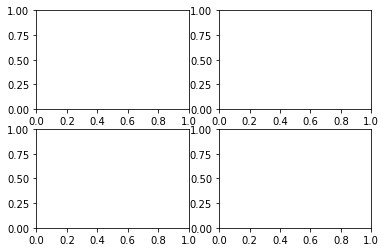

In [53]:

degrees = [1, 2, 3, 4]

# define the structure of the figure
num_row = 2
num_col = 2
f, axs = plt.subplots(num_row, num_col)
    
for ind, degree in enumerate(degrees):

        polynome = build_poly(x_tr,degree)
        w = least_squares(y_tr, polynome.T)
        MSE = compute_loss(y_tr, polynome, w)

        print("Processing {i}th experiment, degree={d}, mse={loss}".format( 
            i=ind + 1, d=degree, loss=MSE))
        plot_fitted_curve(y_tr, x_tr, weights, degree, axs[ind // num_col][ind % num_col])
        plt.tight_layout()
        plt.show()


## Generate predictions and save ouput in csv format for submission:

In [158]:
# We observed that model 2 with ridge_regression method and lambda_ = 1e-10 (TODO, we have to check them all)

In [163]:
w, loss = ridge_regression(y, tX, 1e-10)

In [96]:
DATA_TEST_PATH = '../data/test.csv' # TODO: unzip the file
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [97]:
OUTPUT_PATH = 'out.csv'
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)